# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Answering Questions

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Turn project folder path into a string
path = r'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [5]:
# Check path
path

'/Users/thomasradio/Documents/Jupyter/230808 Tom Radio Achievement 6 Project'

In [6]:
# Import pugetsound_tides_currents_lunar.pkl dataset
pugetsound_tides_currents = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pugetsound_tides_currents_lunar.pkl'))

### 2. Data Cleaning

In [7]:
pugetsound_tides_currents.head()

,Dive_Site,Date,Day_of_Week,Time,Event,Current_Speed_(knots),Height (cm),Height (ft),Current_Station_Name,Current_Station_ID,Tide_Station_Name,Tide_Station_ID,Latitude,Longitude,Moon Illuminated
0,Alki,1/1/24,Monday,0:24:00,ebb,-0.5,NaN,NaN,HARBOR ISLAND WEST,PUG1507,NaN,NaN,47.588707,-122.380009,0.75
1,Alki,1/1/24,Monday,1:34:00,Low,NaN,20.0,0.66,NaN,NaN,LOCKHEED SHIPYARD,9447110.0,47.588707,-122.380009,0.75
2,Alki,1/1/24,Monday,4:00:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1508,NaN,NaN,47.588707,-122.380009,0.75
3,Alki,1/1/24,Monday,6:12:00,flood,0.1,NaN,NaN,HARBOR ISLAND WEST,PUG1509,NaN,NaN,47.588707,-122.380009,0.75
4,Alki,1/1/24,Monday,8:36:00,slack,0.0,NaN,NaN,HARBOR ISLAND WEST,PUG1510,NaN,NaN,47.588707,-122.380009,0.75


In [8]:
pugetsound_tides_currents.shape

(16626, 15)

In [9]:
pugetsound_tides_currents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16626 entries, 0 to 16625
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dive_Site              16626 non-null  object 
 1   Date                   16626 non-null  object 
 2   Day_of_Week            16626 non-null  object 
 3   Time                   16626 non-null  object 
 4   Event                  16626 non-null  object 
 5   Current_Speed_(knots)  11000 non-null  float64
 6   Height (cm)            5626 non-null   float64
 7   Height (ft)            5626 non-null   float64
 8   Current_Station_Name   11000 non-null  object 
 9   Current_Station_ID     11000 non-null  object 
 10  Tide_Station_Name      5626 non-null   object 
 11  Tide_Station_ID        5626 non-null   float64
 12  Latitude               16626 non-null  float64
 13  Longitude              16626 non-null  float64
 14  Moon Illuminated       16626 non-null  float64
dtypes:

In [10]:
pugetsound_tides_currents.describe()

,Current_Speed_(knots),Height (cm),Height (ft),Tide_Station_ID,Latitude,Longitude,Moon Illuminated
count,11000.000000,5626.000000,5626.000000,5.626000e+03,16626.000000,16626.000000,16626.000000
mean,-0.155291,187.159616,6.140380,9.446442e+06,47.854009,-122.808317,0.493181
std,2.373397,135.987617,4.461695,1.428594e+03,0.455312,0.513345,0.352959
min,-8.600000,-109.000000,-3.590000,9.444122e+06,47.265336,-123.704473,0.000000
25%,-0.100000,77.250000,2.542500,9.446486e+06,47.265336,-122.644900,0.132500
50%,0.000000,209.000000,6.870000,9.447110e+06,47.588707,-122.544439,0.480000
75%,0.000000,298.750000,9.797500,9.447995e+06,48.405722,-122.544439,0.850000
max,7.200000,442.000000,14.510000,9.447995e+06,48.405722,-122.380009,1.000000


In [11]:
# Check for duplicates
print(pugetsound_tides_currents.duplicated().sum())

0


In [12]:
# Check for missing values
print(pugetsound_tides_currents.isnull().sum())

Dive_Site                    0
Date                         0
Day_of_Week                  0
Time                         0
Event                        0
Current_Speed_(knots)     5626
Height (cm)              11000
Height (ft)              11000
Current_Station_Name      5626
Current_Station_ID        5626
Tide_Station_Name        11000
Tide_Station_ID          11000
Latitude                     0
Longitude                    0
Moon Illuminated             0
dtype: int64


### 3. Exploring Relationships

### Correlations:

In [13]:
# Create a correlation matrix using pandas

pugetsound_tides_currents.corr()

/var/folders/wy/62t22_pd525blsykm014z4tm0000gn/T/ipykernel_43443/1053106007.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pugetsound_tides_currents.corr()


,Current_Speed_(knots),Height (cm),Height (ft),Tide_Station_ID,Latitude,Longitude,Moon Illuminated
Current_Speed_(knots),1.000000,NaN,NaN,NaN,-0.057475,0.019887,0.000964
Height (cm),NaN,1.000000,0.999998,0.171760,-0.178412,0.229290,-0.002640
Height (ft),NaN,0.999998,1.000000,0.171712,-0.178448,0.229263,-0.002675
Tide_Station_ID,NaN,0.171760,0.171712,1.000000,-0.021763,0.878553,-0.001450
Latitude,-0.057475,-0.178412,-0.178448,-0.021763,1.000000,-0.481377,0.000543
Longitude,0.019887,0.229290,0.229263,0.878553,-0.481377,1.000000,-0.001065
Moon Illuminated,0.000964,-0.002640,-0.002675,-0.001450,0.000543,-0.001065,1.000000


/var/folders/wy/62t22_pd525blsykm014z4tm0000gn/T/ipykernel_43443/307713583.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(pugetsound_tides_currents.corr())


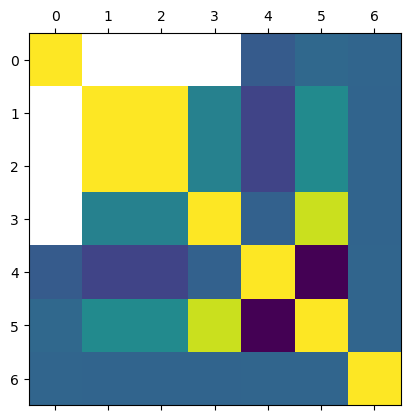

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(pugetsound_tides_currents.corr())
plt.show()

#### Create a correlation heatmap using seaborn:

In [15]:
# Select Relevant Numeric Columns
numeric_columns = ['Current_Speed_(knots)', 'Height (cm)', 'Height (ft)', 'Moon Illuminated']
numeric_data = pugetsound_tides_currents[numeric_columns]

In [16]:
# Calculate Correlation Matrix
correlation_matrix = numeric_data.corr()

In [17]:
numeric_data.corr()

,Current_Speed_(knots),Height (cm),Height (ft),Moon Illuminated
Current_Speed_(knots),1.000000,NaN,NaN,0.000964
Height (cm),NaN,1.000000,0.999998,-0.002640
Height (ft),NaN,0.999998,1.000000,-0.002675
Moon Illuminated,0.000964,-0.002640,-0.002675,1.000000


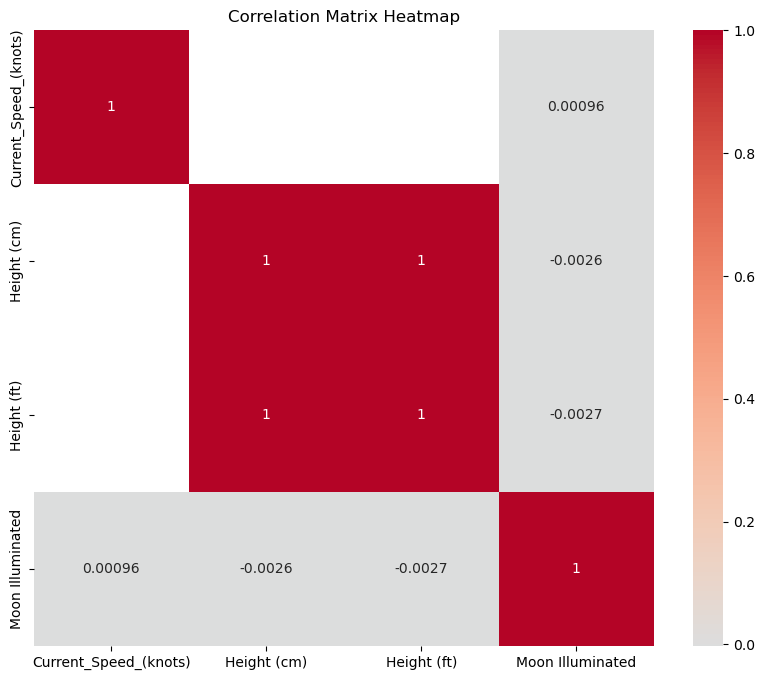

In [18]:
# Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Correlation Matrix Heatmap Insights:

The correlation matrix didn't provide us with clear insights into our data because the numbers we used to measure things, like the speed of water movement and how much of the moon we can see, are influenced by a mix of factors that create more intricate patterns. For instance, the speed of the water changes based on tidal cycles and moon phases, which can vary from day to day, and multiple times per day. However, the 'Moon Illuminated' number actually does change in a simple way – as each day passes, more of the moon becomes visible until it's fully visible (1), then it decreases back to not visible (0), and so on.

In cases like these, where things aren't straightforwardly related, the correlation matrix heatmap method we used to find connections in the data doesn't work well. It's a bit like trying to draw a straight line on a road with lots of twists and turns – it just doesn't fit. Instead, we need to use different approaches to understand the data better. These methods should help us uncover interesting insights in the data, even when the relationship isn't as simple as we initially thought.

### Scatterplots:

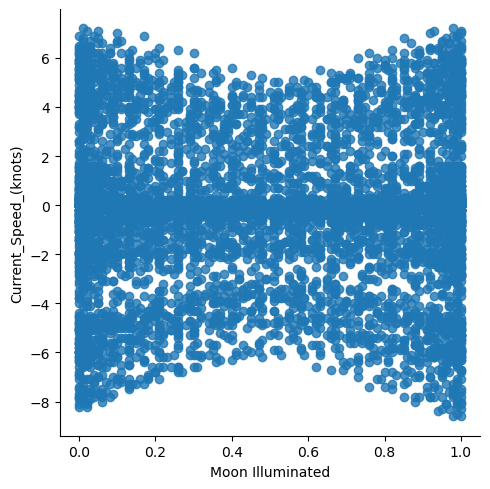

In [19]:
# Create a scatterplot for the "Moon Illuminated" and "Current_Speed_(knots)" columns in seaborn

sns.lmplot(x = 'Moon Illuminated', y = 'Current_Speed_(knots)', data = numeric_data)

### Scatterplot Insights:

In the scatterplot, we can see how the moon's phases link with ocean current strength using 'Moon Illuminated' and 'Current_Speed_(knots)' data. This revealed a fascinating pattern: during full and new moon phases, we witnessed significantly faster currents. This aligns with the moon's gravitational influence on tides.

Comparing this to the correlation matrix heatmap, the scatterplot offers a more vivid picture of the connection between moon phases and current strength. The scatterplot's visual representation lets us directly observe the surge in current speed around full and new moon times, whereas the heatmap didn't capture this nuanced relationship.

### Pair Plots:

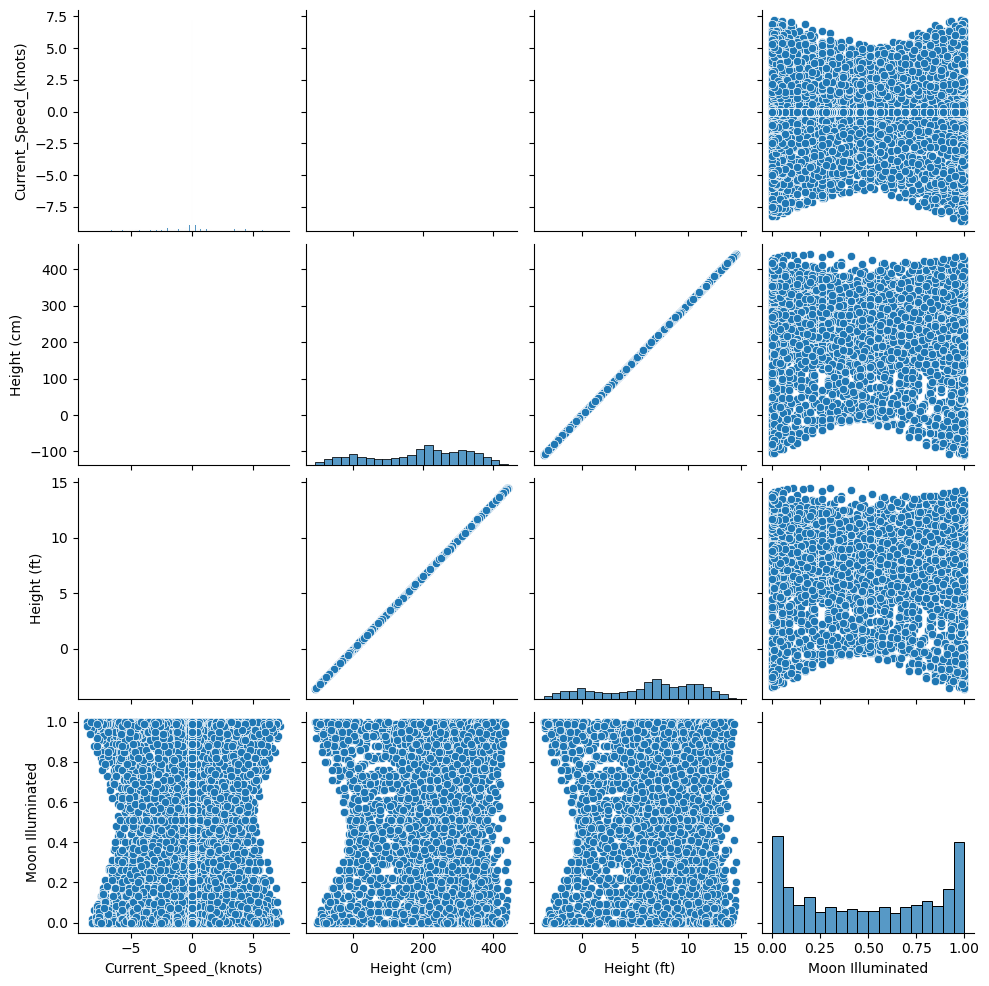

In [20]:
# Create a pair plot 

g = sns.pairplot(numeric_data)

### Pair Plot Insights:

Distribution Insight: The diagonal histograms provided a snapshot of how 'Moon Illuminated', 'Current_Speed_(knots)', and 'Height' are distributed. This gives us an initial sense of their ranges.

Moon and Currents: The scatterplot of 'Moon Illuminated' against 'Current_Speed_(knots)' caught our attention. We noticed that as the moon's brightness changes, current speed tends to increase or decrease. This aligns with our earlier understanding of stronger currents during full and new moon phases.

Tides and Moon: Another scatterplot, 'Moon Illuminated' versus 'Height (cm)/(ft)', unveiled the moon's influence on water height. It reflected how water levels vary as the moon's brightness changes, echoing the moon's role in tidal shifts.

Further Exploration:

Moon, Tides, and Currents: Investigating the link between 'Moon Illuminated', 'Height (cm)/(ft)', and 'Current_Speed_(knots)' can provide valuable insights into the exact ways moon phases affect ocean tides currents. This knowledge can aid in effective dive planning by considering currents' impact on underwater conditions.

### Categorical Plots:

<Axes: xlabel='Current_Speed_(knots)', ylabel='Count'>

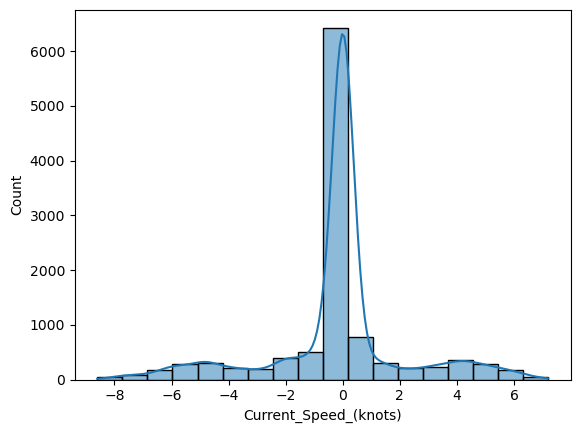

In [21]:
# Creating a categorical variable that splits the "Current_Speed_(knots)" column into categories
sns.histplot(numeric_data['Current_Speed_(knots)'], bins = 18, kde = True)

### At this point, I thought it would be helpful to remove the '-' signs from all entries in the 'Current_Speed_(knots)' column to ensure consistent and accurate data representation. The negative signs originally indicated the direction of current flow, but since we're focusing on the magnitude of current speed for analysis, removing the signs allowed us to treat all values as positive, simplifying comparisons and calculations.

In [22]:
# Define a function to remove "-" signs and convert to positive
def remove_minus_and_make_positive(value):
    if isinstance(value, (int, float)):  # Make sure the value is numeric
        return abs(value)  # Convert to positive
    return value  # Keep non-numeric values unchanged

# Create a new DataFrame with modified values
modified_numeric_data = numeric_data.applymap(remove_minus_and_make_positive)


### Now I want to run through the correlation matrix heatmap, scatterplot, pair plot, and creating the  categorical variables again with the revised data to see if it makes more sense.

In [23]:
modified_numeric_data.describe()

,Current_Speed_(knots),Height (cm),Height (ft),Moon Illuminated
count,11000.000000,5626.000000,5626.000000,16626.000000
mean,1.290073,198.911127,6.526146,0.493181
std,1.998173,118.130906,3.875505,0.352959
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,87.000000,2.870000,0.132500
50%,0.000000,209.000000,6.870000,0.480000
75%,2.000000,298.750000,9.797500,0.850000
max,8.600000,442.000000,14.510000,1.000000


In [24]:
# Calculate Correlation Matrix
modified_correlation_matrix = modified_numeric_data.corr()

In [25]:
modified_numeric_data.corr()

,Current_Speed_(knots),Height (cm),Height (ft),Moon Illuminated
Current_Speed_(knots),1.000000,NaN,NaN,-0.000225
Height (cm),NaN,1.000000,0.999997,-0.003940
Height (ft),NaN,0.999997,1.000000,-0.003970
Moon Illuminated,-0.000225,-0.003940,-0.003970,1.000000


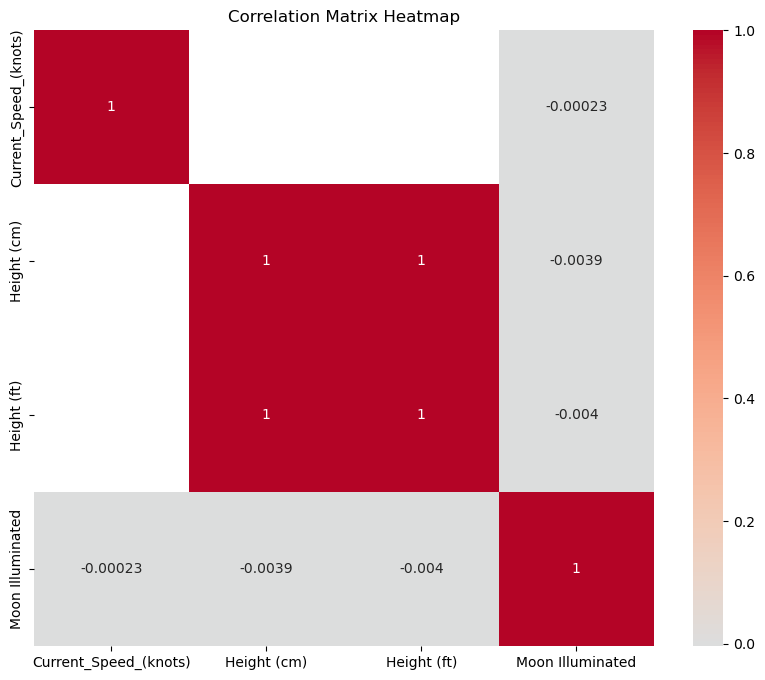

In [26]:
# Create the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(modified_correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


### There was no improvement to the correlation matrix heatmap by removing the "-" signs from the current speed column.

### Scatterplots:

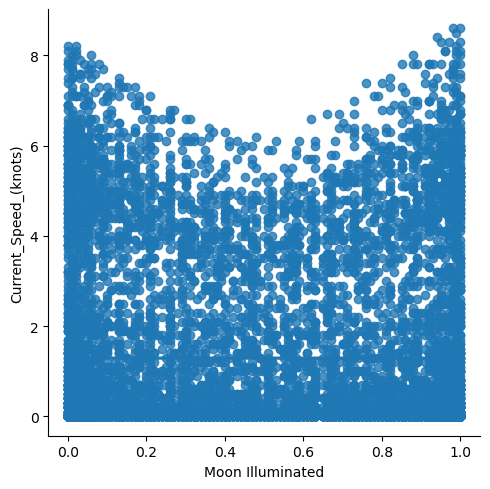

In [27]:
# Create a scatterplot for the "Moon Illuminated" and "Current_Speed_(knots)" columns in seaborn

sns.lmplot(x = 'Moon Illuminated', y = 'Current_Speed_(knots)', data = modified_numeric_data)

### Pair Plots:

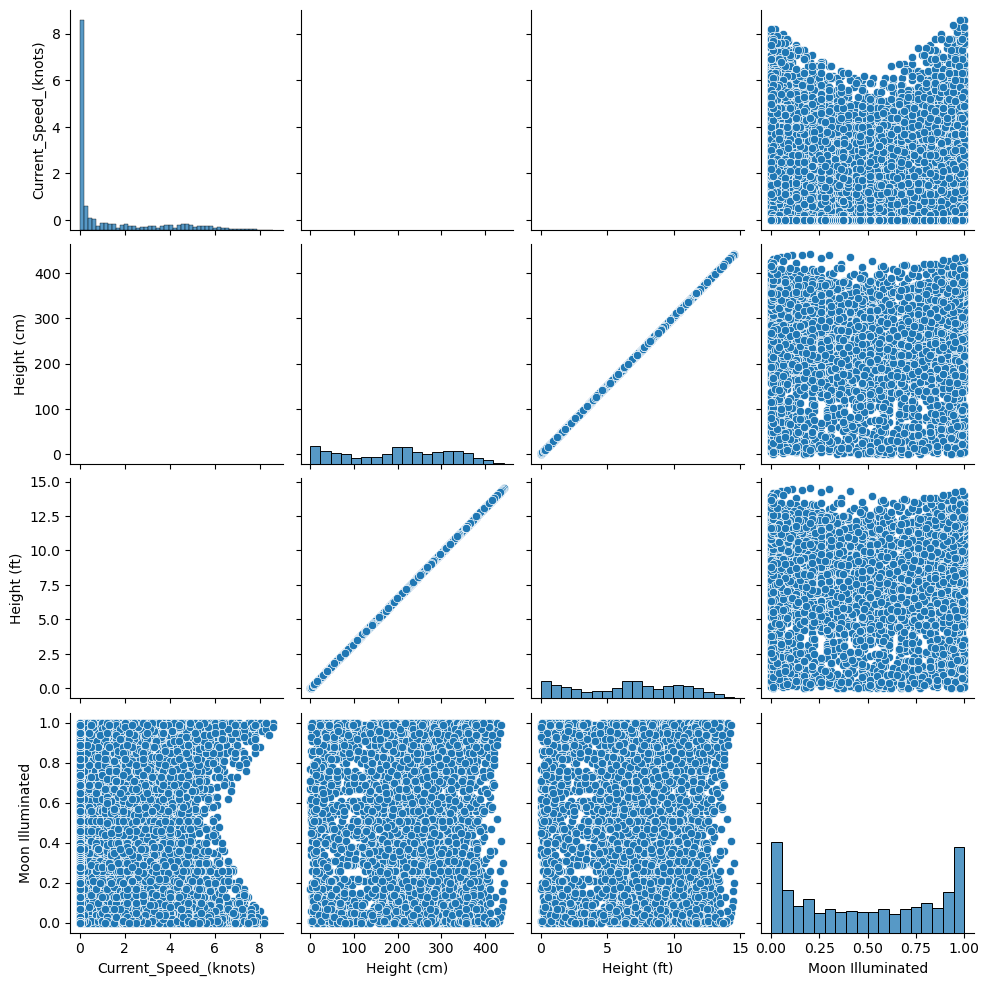

In [28]:
# Create a pair plot 

g = sns.pairplot(modified_numeric_data)

### Categorical Plots:

<Axes: xlabel='Current_Speed_(knots)', ylabel='Count'>

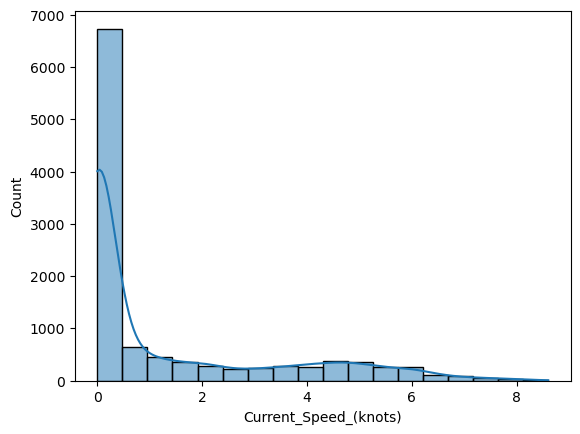

In [29]:
# Creating a categorical variable that splits the "Current_Speed_(knots)" column into categories
sns.histplot(modified_numeric_data['Current_Speed_(knots)'], bins = 18, kde = True)

### In the scatterplot, pair plots, and categorical plots depicting 'Moon Illuminated' against 'Current_Speed_(knots)', the elimination of negative signs rendered the data more intuitive. We were able to discern the relationship between moon phases and current strength without the distraction of opposing signs, gaining a clearer grasp of how moon illumination influences currents.

In [30]:
modified_numeric_data.loc[modified_numeric_data['Current_Speed_(knots)'] == 0, 'Current speed category'] = 'No Current'

In [31]:
modified_numeric_data.loc[(modified_numeric_data['Current_Speed_(knots)'] > 0) & (modified_numeric_data['Current_Speed_(knots)'] <= 1), 'Current speed category'] = 'Weak Current'

In [32]:
modified_numeric_data.loc[modified_numeric_data['Current_Speed_(knots)'] > 1, 'Current speed category'] = 'Strong Current'

In [33]:
modified_numeric_data['Current speed category'].value_counts(dropna = False)

NaN               5626
No Current        5554
Strong Current    3517
Weak Current      1929
Name: Current speed category, dtype: int64

In [34]:
modified_numeric_data.columns

Index(['Current_Speed_(knots)', 'Height (cm)', 'Height (ft)',
       'Moon Illuminated', 'Current speed category'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

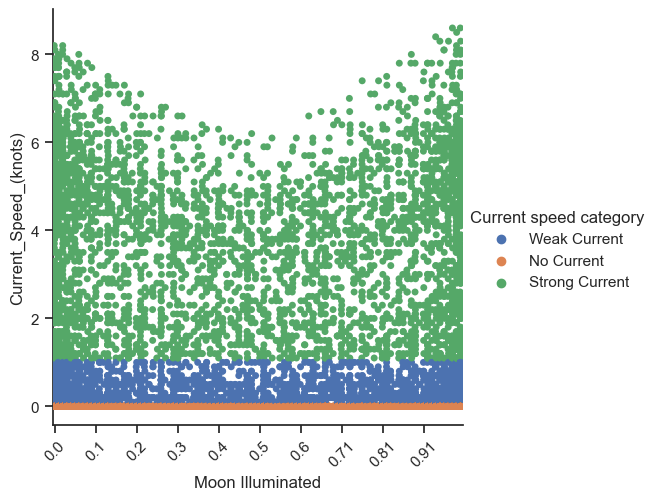

In [43]:
# Create a categorical plot in seaborn using the current speed categories created above
plt.figure(figsize=(12, 8))
# Set the style
sns.set(style="ticks")

# Create the categorical plot
g = sns.catplot(x="Moon Illuminated", y="Current_Speed_(knots)", hue="Current speed category", data=modified_numeric_data)

# Limit the number of x-axis labels
plt.xticks(rotation=45)  # Rotate labels for readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Limit the number of x-axis tick positions

# Show the plot
plt.show()

In [45]:
g.savefig('categorical_plot.png')

### Categorical Plot Insights:

In this chart, we explored three types of water currents: 'No current', 'Weak current', and 'Strong current'. What's fascinating is how these currents relate to different phases of the moon, whether it's shining brightly or not.

Reliable Tide Effects: The 'No current' and 'Weak current' situations are a regular occurrence, regardless of the moon's brightness. These currents happen naturally due to factors like tides – you can think of them as the gentle ebb and flow of water, similar to waves at the beach.

Strong Currents and Moon Phases: The 'Strong current' instances are quite intriguing. We notice they tend to coincide with the moon's phases when it's either very bright (full moon) or very dim (new moon). During these phases, the moon's gravitational tug on the water, along with the sun's, becomes more powerful. This enhanced gravitational force causes larger tidal variations, resulting in stronger currents.

Weaker Currents and Middle Moon Phases: On the other hand, during moon phases where the moon is midway between bright and dim, like the waxing and waning gibbous phases, we observe a decrease in the 'Strong current' situations. This happens because the gravitational effects of the moon and sun are less pronounced during these phases, leading to milder tidal ranges and subsequently milder currents.

### 4. Answering Questions

## Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### If you created a dashboard with the data above, could the dashboard predict periods of slack tide or low current speed, which are generally safer for diving? How can the dashboard help divers identify windows of opportunity for safer and more enjoyable dives?

Yes, the dashboard could predict safer diving conditions by leveraging the connections between moon phases, tidal patterns, and current speeds. By identifying moments when the moon's brightness aligns with weaker currents, the dashboard empowers divers to plan dives during these windows, enhancing safety and overall diving experiences.

### How can the dashboard serve as an educational tool for divers, helping them understand the relationship between tide, currents, and diving conditions?

The dashboard can function as an educational tool for divers by visually demonstrating the links between tides, currents, and diving conditions. Through interactive visualizations, divers can observe how moon phases influence current strength and water levels.

### How do currents affect diving conditions at various dive sites?

Currents impact diving conditions differently across dive sites. Visualizations reveal how moon phases correlate with current strength. Divers can identify sites prone to stronger currents during certain lunar phases. This knowledge allows divers to choose sites based on their comfort level with prevailing currents, enhancing safety and diving experiences.

## New questions based on the early findings of these visualizations:

How precisely do moon phases influence the magnitude of current speeds?

Do certain tidal conditions consistently align with specific moon phases? For instance, do we observe stronger currents consistently during high tides on full or new moon phases?

How do the interactions between moon phases, tides, and currents collectively impact diving conditions?

Are there dive sites where these factors harmonize to create optimal or challenging diving scenarios?

## Define any hypotheses that you can at this point. You’ll be testing these later on.

The moon's illumination is positively correlated with current speed and tide height. Specifically, full and new moon phases will correspond to stronger currents, and larger tidal exchanges, while other phases will have comparatively weaker currents and smaller tidal exchanges.